# Assignment #3 - Experiments
## Convolutional Neural Networks
Author: **Jakub Biegas**
Student index: **260344**

### Import AffNIST Dataset

In [1]:
from assignment_1.dataset import AffnistDataset

affnist_dataset = AffnistDataset(
    training_data_path="../assignment_1/data/processed/affnist/training_batches",
    test_data_path="../assignment_1/data/processed/affnist/test_batches",
)
X_train, X_test, y_train, y_test = (
    affnist_dataset.X_train,
    affnist_dataset.X_test,
    affnist_dataset.y_train,
    affnist_dataset.y_test,
)

X_train = X_train.reshape(X_train.shape[0], 1, 40, 40)
X_test = X_test.reshape(X_test.shape[0], 1, 40, 40)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 1, 40, 40), (10000, 1, 40, 40), (50000,), (10000,))

### Plot samples from the AffNIST dataset

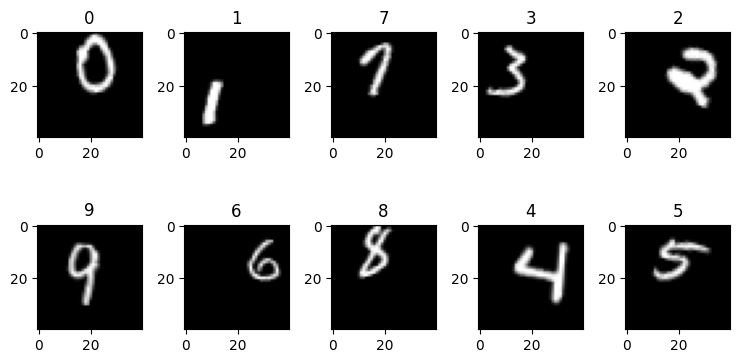

In [2]:
from assignment_3.utils.plot import plot_samples

plot_samples(X_train, y_train, shape=(40, 40))

## Load pickled autoencoder

In [3]:
from assignment_3.utils.pickle import load_pickle

autoencoder = load_pickle("pickles/autoencoder.pickle")
autoencoder_optimizer = load_pickle("pickles/autoencoder_optimizer.pickle")

## Process and visualize unseen examples

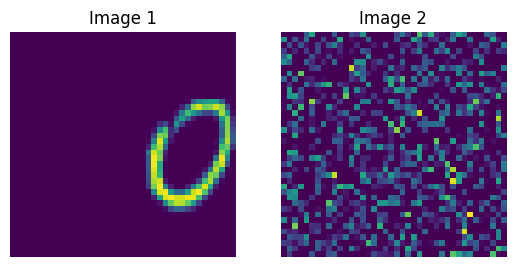

In [12]:
import matplotlib.pyplot as plt


image, label = X_test[0].reshape(1, 1, 40, 40), y_test
reconstructed_image = autoencoder.forward(image)

fig, (ax1, ax2) = plt.subplots(1, 2)  # 1 row, 2 columns

# Display first image
ax1.imshow(image.reshape(40, 40))
ax1.set_title("Original")
ax1.axis("off")  # Hide axes

# Display second image
ax2.imshow(reconstructed_image.reshape(40, 40))
ax2.set_title("Reconstructed")
ax2.axis("off")  # Hide axes

plt.show()

### Plot filters from the first Convolutional Layer

(16, 8, 3, 3)


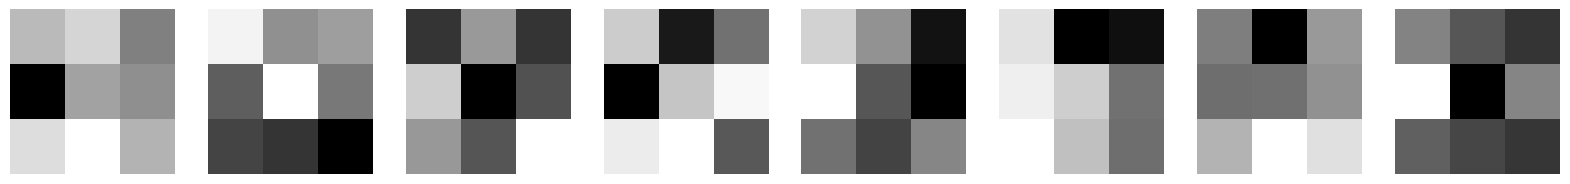

In [17]:
fig, axes = plt.subplots(1, 8, figsize=(20, 5))

for i in range(8):
    ax = axes[i]
    ax.imshow(autoencoder.hidden_layers[0].kernels[i, 0, :, :], cmap="gray")
    ax.axis("off")

plt.show()

## Plot filters from the second Convolutional Layer

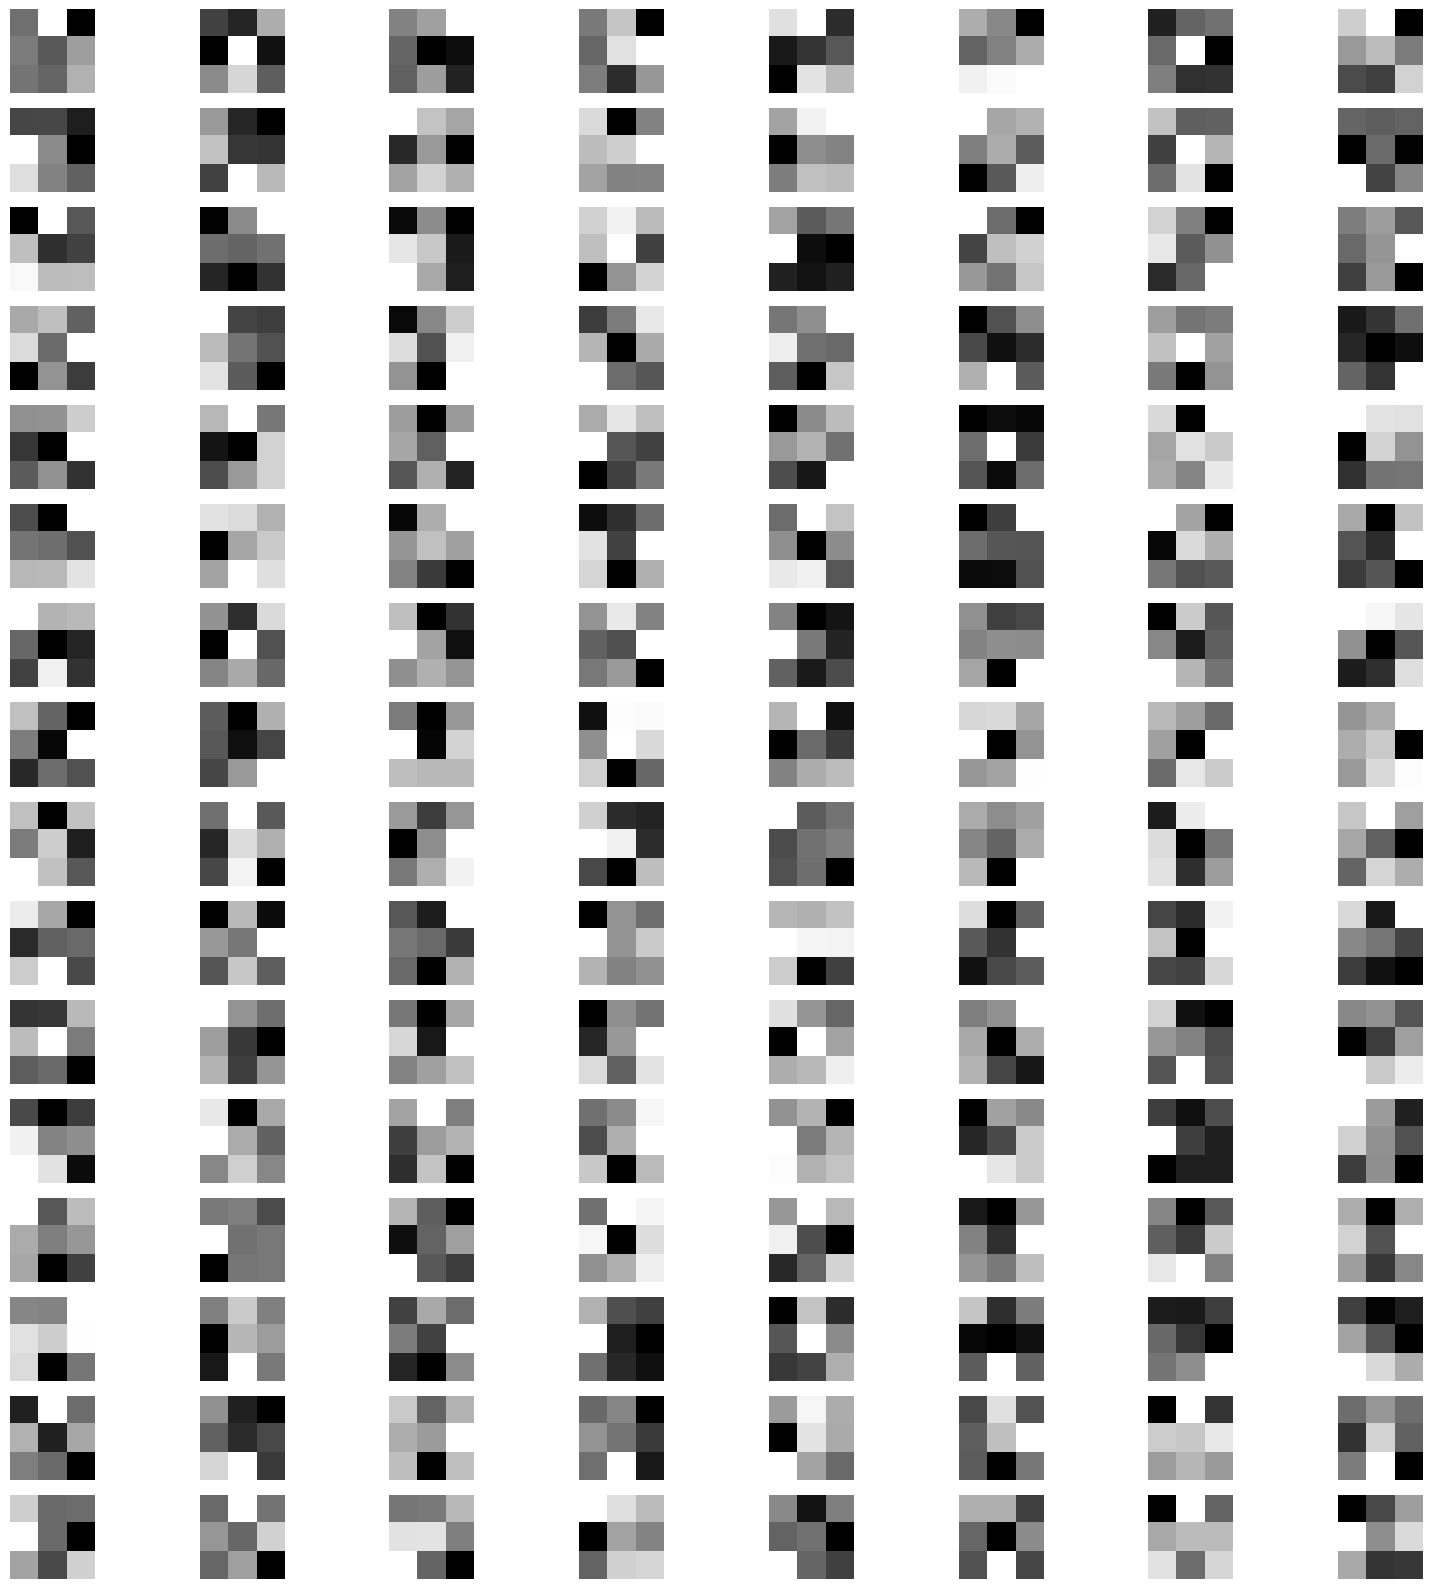

In [19]:
fig, axes = plt.subplots(16, 8, figsize=(16, 16))

for i in range(16):
    for j in range(8):
        ax = axes[i, j]
        ax.imshow(autoencoder.hidden_layers[2].kernels[i, j, :, :], cmap="gray")
        ax.axis("off")

plt.tight_layout()
plt.show()

### Plot feature maps from the first Convolutional Layer

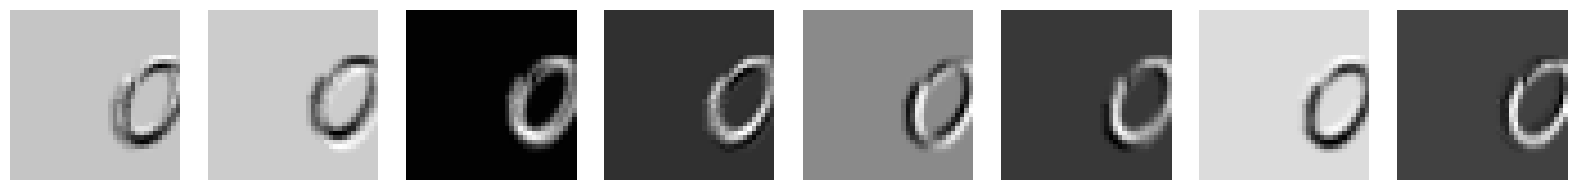

In [23]:
fig, axes = plt.subplots(1, 8, figsize=(16, 2))

for i in range(8):
    ax = axes[i]
    ax.imshow(autoencoder.hidden_layers[0].outputs[0, i, :, :], cmap="gray")
    ax.axis("off")

plt.tight_layout()
plt.show()

In [24]:
autoencoder.hidden_layers[2].outputs.shape

(1, 16, 17, 17)

### Plot feature maps from the second Convolutional Layer

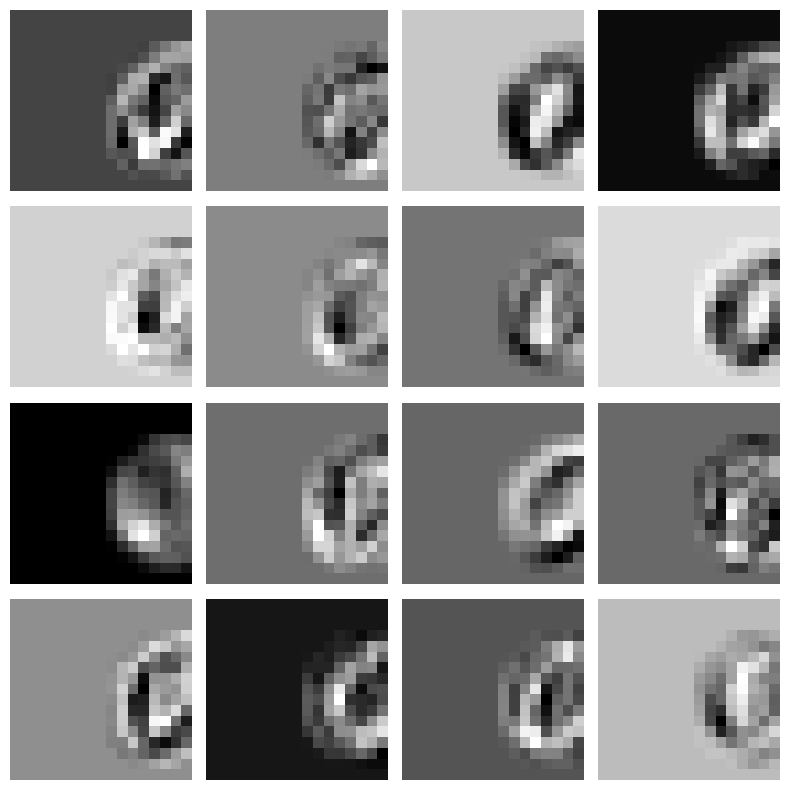

In [26]:
fig, axes = plt.subplots(4, 4, figsize=(8, 8))

for i in range(4):
    for j in range(4):
        idx = i * 4 + j

        ax = axes[i, j]
        ax.imshow(autoencoder.hidden_layers[2].outputs[0, idx, :, :], cmap="gray")
        ax.axis("off")

plt.tight_layout()
plt.show()

## Visualization of unseen data in a space of low dimensionality with UMAP

### Visualize original test data

<Axes: >

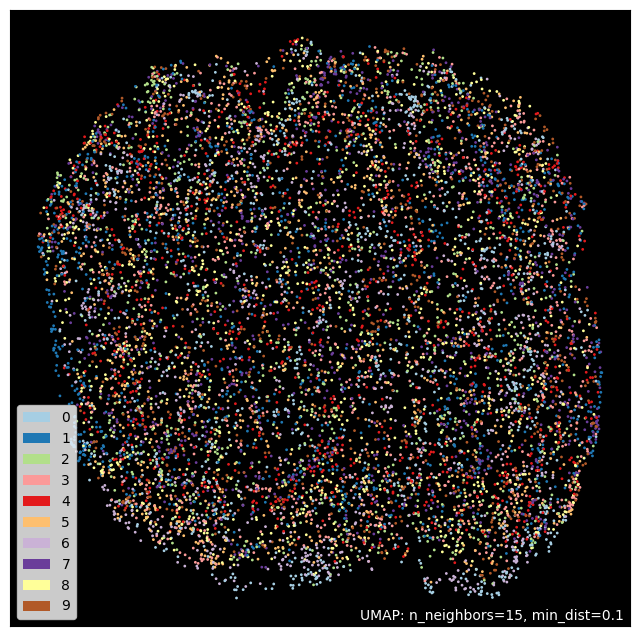

In [29]:
import umap.plot

from assignment_3.utils.save import to_tsv

reducer = umap.UMAP()
mapper = reducer.fit(X_test.reshape(X_test.shape[0], 1600))
embeddings_original = mapper.transform(X_test.reshape(X_test.shape[0], 1600))

to_tsv(X_test.reshape(X_test.shape[0], 1600), "embeddings/embeddings_original.tsv")
to_tsv(y_test, "embeddings/embeddings_original_metadata.tsv")

umap.plot.points(mapper, labels=y_test, color_key_cmap="Paired", background="black")

### Visualize images encoded by the Autoencoder

In [44]:
import numpy as np

codes = []
for image in X_test:
    image = image.reshape(1, 1, 40, 40)
    encoded_image = autoencoder.forward(image)
    code = autoencoder.hidden_layers[4].outputs
    codes.append(code.reshape(-1))

to_tsv(codes, "embeddings/code_embeddings.tsv")
to_tsv(y_test, "embeddings/code_embeddings_metadata.tsv")

codes = np.array(codes)
codes.shape

(10000, 1024)

<Axes: >

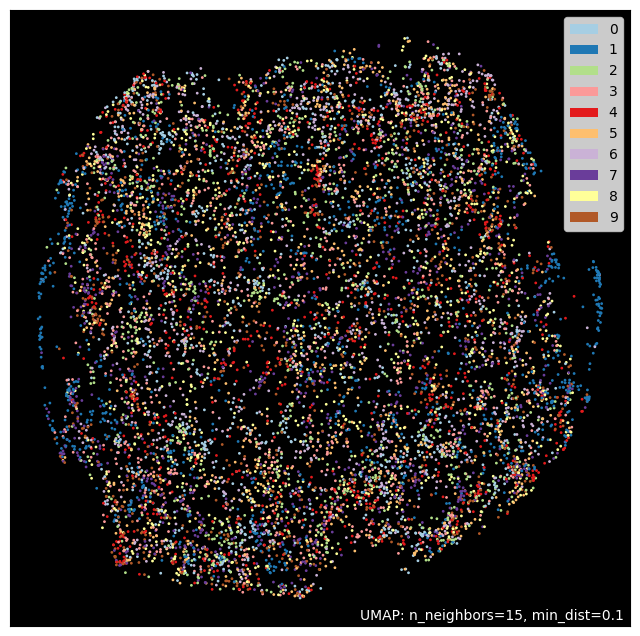

In [45]:
code_mapper = reducer.fit(codes)
code_embeddings = code_mapper.transform(codes)

umap.plot.points(
    code_mapper,
    labels=y_test,
    color_key_cmap="Paired",
    background="black",
)